In [48]:
# import libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [49]:
# for google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# load csv
file_path = "/content/drive/My Drive/0 - School Work/Master's Classes/2025 Spring/Data Mining/NFL Play by Play 2009-2018 (v5).csv"
df = pd.read_csv(file_path)

<ipython-input-50-c5968d2e5e19>:3: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [51]:
df.head(5)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
1,68,2009091000,PIT,TEN,PIT,home,TEN,PIT,58.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,home,TEN,PIT,53.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,home,TEN,PIT,56.0,2009-09-10,...,NaN,NaN,NaN,0,NaN,NaN,0.0,0.0,0.0,0.0


In [52]:
df.shape

(449371, 255)

In [53]:
# filter pass plays
pass_df = df[df['play_type'] == 'pass']
pass_df.shape

(186677, 255)

In [54]:
# select input features and target
input_features = pass_df[['quarter_seconds_remaining', 'down', 'ydstogo', 'yardline_100',
                     'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
                     'score_differential', 'qb_scramble', 'shotgun', 'no_huddle',
                     'comp_air_epa', 'comp_yac_epa']]

target_features = pass_df['pass_touchdown']

# drop missing values and align tables
input_features = input_features.dropna()
target_features = target_features.loc[input_features.index]

input_features.head()

,quarter_seconds_remaining,down,ydstogo,yardline_100,pass_length,pass_location,air_yards,yards_after_catch,score_differential,qb_scramble,shotgun,no_huddle,comp_air_epa,comp_yac_epa
1,893.0,1.0,10,58.0,short,left,-3.0,8.0,0.0,0,0,0,-0.938735,1.016643
6,760.0,2.0,10,98.0,short,left,3.0,1.0,0.0,0,0,0,-0.521641,0.342492
9,684.0,1.0,10,43.0,short,right,-2.0,5.0,0.0,0,0,0,-0.680790,0.465497
10,648.0,2.0,7,40.0,short,left,-1.0,11.0,0.0,0,0,0,-0.877942,1.740365
12,583.0,2.0,11,31.0,short,right,-2.0,11.0,0.0,0,0,0,-0.906339,1.156385


In [55]:
target_features.head()

,pass_touchdown
1,0.0
6,0.0
9,0.0
10,0.0
12,0.0


In [34]:
input_features.shape

(108421, 14)

In [56]:
# preprocessing

categorical_cols = ['pass_length', 'pass_location']
numeric_cols = [col for col in input_features.columns if col not in categorical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [57]:
# tansform Input Features
X = preprocessor.fit_transform(input_features)
y = target_features

In [58]:
# split training and test data
# 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=513)

In [59]:
# train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# evaluate model
y_pred = logreg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9953885174083468
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20160
         1.0       0.95      0.99      0.97      1525

    accuracy                           1.00     21685
   macro avg       0.97      0.99      0.98     21685
weighted avg       1.00      1.00      1.00     21685



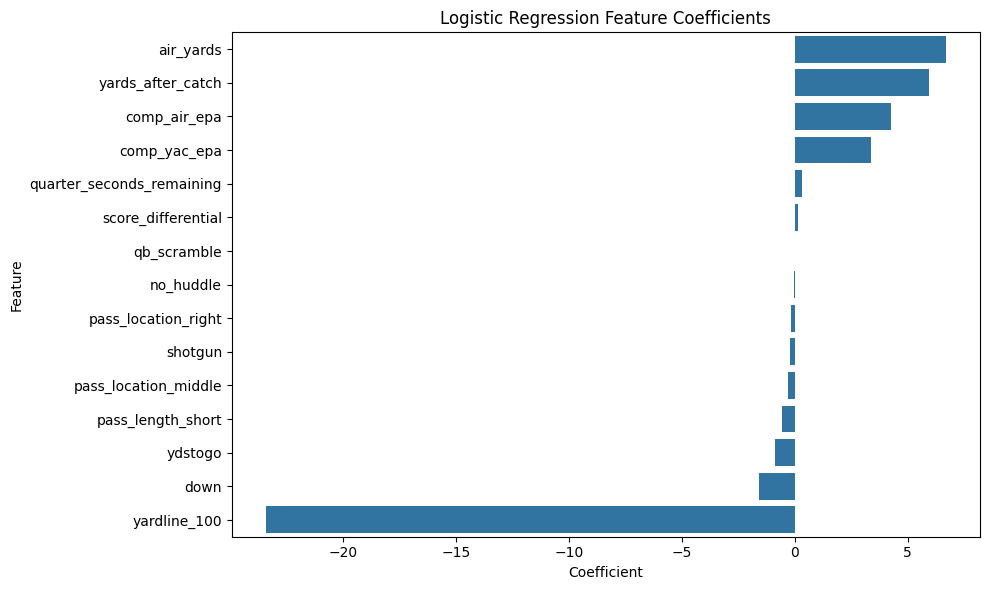

In [63]:
import seaborn as sns

# Get feature names after encoding
encoded_feature_names = numeric_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

# Plot coefficients
coefficients = logreg.coef_[0]
coef_df = pd.DataFrame({'Feature': encoded_feature_names, 'Coefficient': coefficients})

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df.sort_values(by='Coefficient', ascending=False))
plt.title("Logistic Regression Feature Coefficients")
plt.tight_layout()
plt.show()


In [45]:
new_data = {
    'quarter_seconds_remaining': [893.0],
    'down': [1.0],
    'ydstogo': [10],
    'yardline_100': [13.0],
    'pass_length': ['short'],
    'pass_location': ['left'],
    'air_yards': [15.0],
    'yards_after_catch': [0.0],
    'score_differential': [0.0],
    'qb_scramble': [0],
    'shotgun': [0],
    'no_huddle': [0],
    'comp_air_epa': [4.5212],
    'comp_yac_epa': [0]
}
X_new = pd.DataFrame(new_data)
X_new = preprocessor.transform(X_new)

prediction = logreg.predict(X_new)
print("Prediction (0 = No TD, 1 = TD):", prediction)


Prediction (0 = No TD, 1 = TD): [1.]
